In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import linregress, multivariate_normal
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")


df = pd.read_excel('loan_data.xlsx', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            356 non-null    object
 1   Married           356 non-null    object
 2   Dependents        356 non-null    int64 
 3   Education         356 non-null    object
 4   Self_Employed     336 non-null    object
 5   LoanAmount        356 non-null    int64 
 6   Loan_Amount_Term  356 non-null    int64 
 7   Credit_History    356 non-null    int64 
 8   Property_Area     356 non-null    object
 9   Loan_Status       356 non-null    object
dtypes: int64(4), object(6)
memory usage: 27.9+ KB


In [87]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,128,360,1,Rural,N
1,Male,Yes,0,Graduate,Yes,66,360,1,Urban,Y
2,Male,Yes,0,Not Graduate,No,120,360,1,Urban,Y
3,Male,No,0,Graduate,No,141,360,1,Urban,Y
4,Male,Yes,0,Not Graduate,No,95,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
351,Male,Yes,3,Graduate,No,128,360,1,Urban,Y
352,Male,Yes,0,Graduate,No,108,360,1,Rural,Y
353,Female,No,0,Graduate,No,71,360,1,Rural,Y
354,Male,Yes,3,Graduate,No,40,180,1,Rural,Y


In [88]:
from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
train_df.shape

(249, 10)

In [90]:
train_df = train_df[train_df['LoanAmount'] <= train_df['LoanAmount'].quantile(0.95)]
train_df = train_df[train_df['Loan_Amount_Term'] <= train_df['Loan_Amount_Term'].quantile(0.95)]
train_df.shape

(221, 10)

<Figure size 1000x600 with 0 Axes>

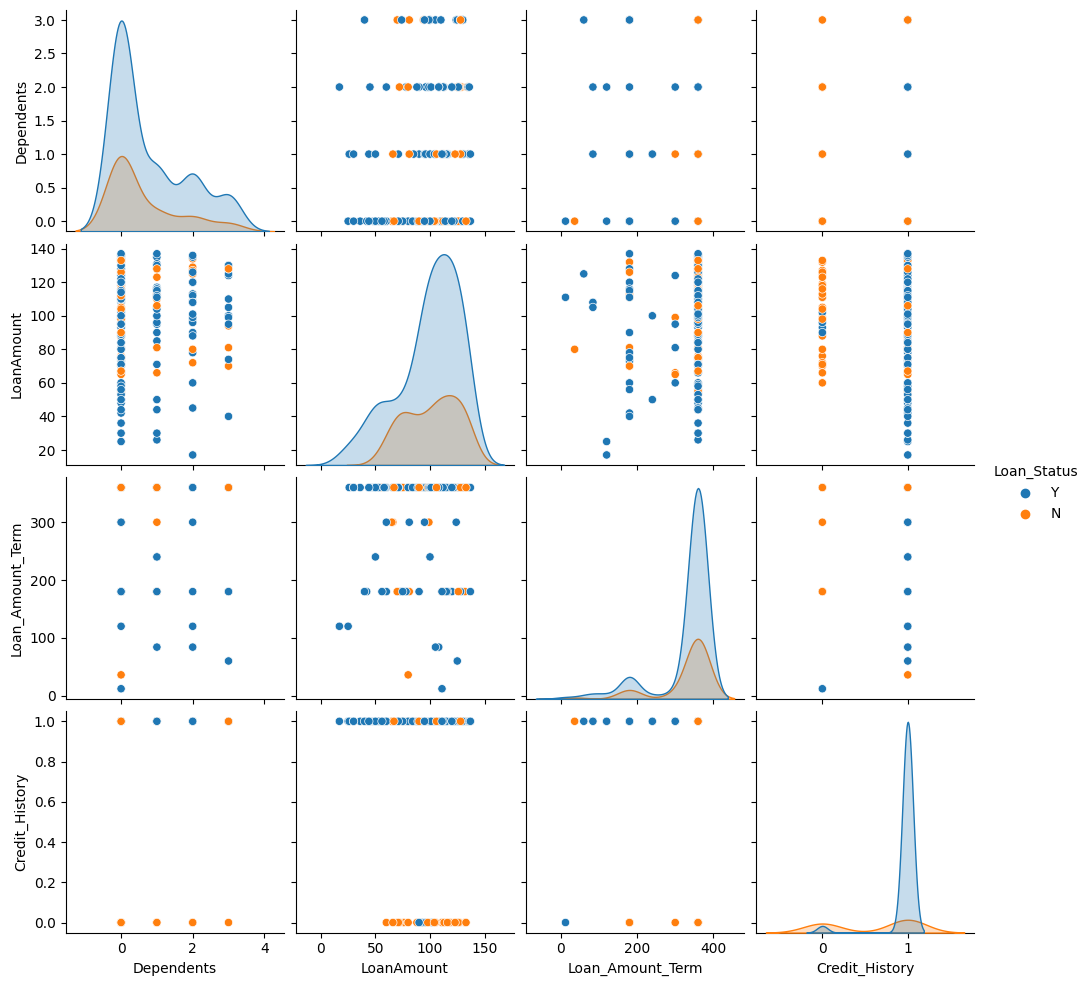

In [91]:
plt.figure(figsize=(10, 6))

sns.pairplot(train_df[['Gender','Married', 'Dependents', 'Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']], hue='Loan_Status')

plt.show()

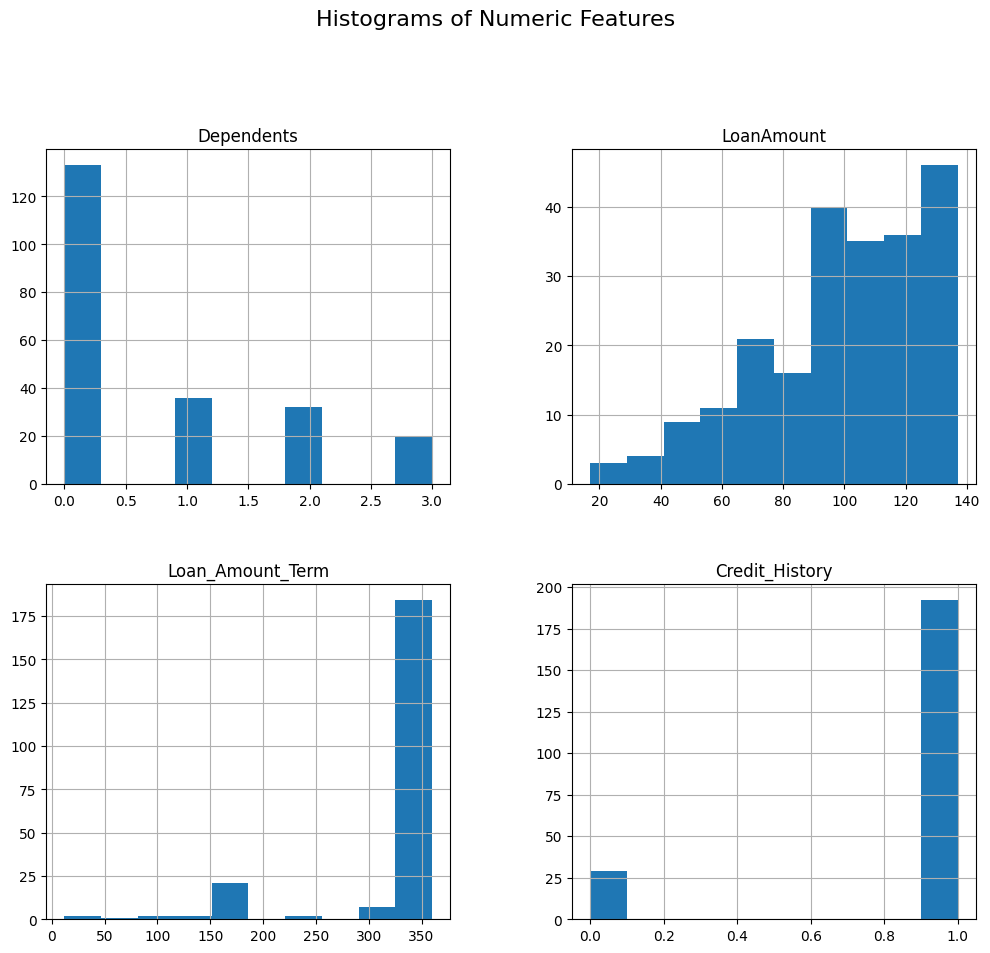

In [93]:
# Построение гистрограм
numeric_features = train_df.select_dtypes(include=['int64'])

# Построим гистограммы для каждого числового признака
numeric_features.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numeric Features', x=0.5, y=1.02, fontsize=16)
plt.show()

In [94]:
n = len(df)
Theta_y = len(df[df['Loan_Status'] == 'Y']) / n
Theta_n = len(df[df['Loan_Status'] == 'N']) / n
print(Theta_y, Theta_n)

0.7219101123595506 0.27808988764044945


In [95]:
def nu(df, species, parameter):
    nu = df[df['Loan_Status'] == species][parameter].mean()
    return nu
nu_species = []
for feature_name in ['LoanAmount', 'Loan_Amount_Term', 'Dependents', 'Credit_History']:
    nu_value = []
    for target_name in ['Y', 'N']:
        nu_value.append(nu(train_df, target_name, feature_name))
    nu_species.append(nu_value)
print(nu_species)




[[98.76073619631902, 101.34482758620689], [331.28834355828224, 329.58620689655174], [0.7668711656441718, 0.603448275862069], [0.9693251533742331, 0.5862068965517241]]


In [96]:
# Выделелние из таблицы только этих четырех столбцов, чтобы найти ковариацию
feature_df = train_df[['LoanAmount', 'Loan_Amount_Term', 'Dependents', 'Credit_History']]
cov = feature_df.cov()
print(cov)

                  LoanAmount  Loan_Amount_Term  Dependents  Credit_History
LoanAmount        745.165570        302.492555    2.494426       -0.205780
Loan_Amount_Term  302.492555       5136.979350   -6.284821        2.920033
Dependents          2.494426         -6.284821    1.037104        0.027252
Credit_History     -0.205780          2.920033    0.027252        0.114521


In [98]:
# Обучите градиентным спуском линейную модель вида
fit_output = linregress(train_df['LoanAmount'].values.tolist(), train_df['Loan_Amount_Term'].values.tolist())
print(fit_output.slope, fit_output.intercept)

0.40594005788028953 290.47539044354187


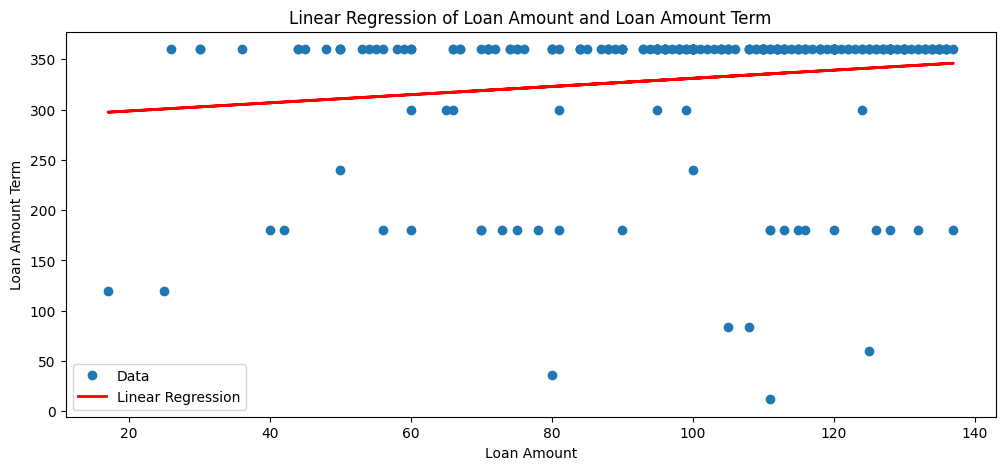

In [109]:
plt.figure(figsize=(12, 5))
plt.plot(train_df['LoanAmount'], train_df['Loan_Amount_Term'], 'o', label='Data')
plt.plot(train_df['LoanAmount'], fit_output.intercept + fit_output.slope * train_df['LoanAmount'], 'r', linewidth=2, label='Linear Regression')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Amount Term')
plt.title('Linear Regression of Loan Amount and Loan Amount Term')
plt.legend()
plt.show()